In [21]:
import torch
import torch.nn.functional as F
from transformers import AutoModelForCausalLM, AutoTokenizer
import matplotlib.pyplot as plt
import numpy as np
import json
import pandas as pd

In [33]:
def get_graph(filename):
    probs = torch.load(filename)
    df = pd.DataFrame(probs)
    baseline_prob = df['target_prob'].mean()
    patched_probs = np.array(df['patched_probabilities'].tolist())
    average_probs = patched_probs.mean(axis=0)
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(12, 7))

    layers = np.arange(32)
    ax.plot(layers, average_probs, marker='o', linestyle='-', color='b', label='Patched Probability')
    ax.axhline(y=baseline_prob, color='r', linestyle='--', label=f'Baseline Probability ({baseline_prob:.4f})')

    ax.set_xlabel("Patched Layer Index", fontsize=12)
    ax.set_ylabel("Probablities")
    ax.set_xticks(layers)
    ax.tick_params(axis='x', rotation=45)


### Benchmarking for Patches across 10 examples

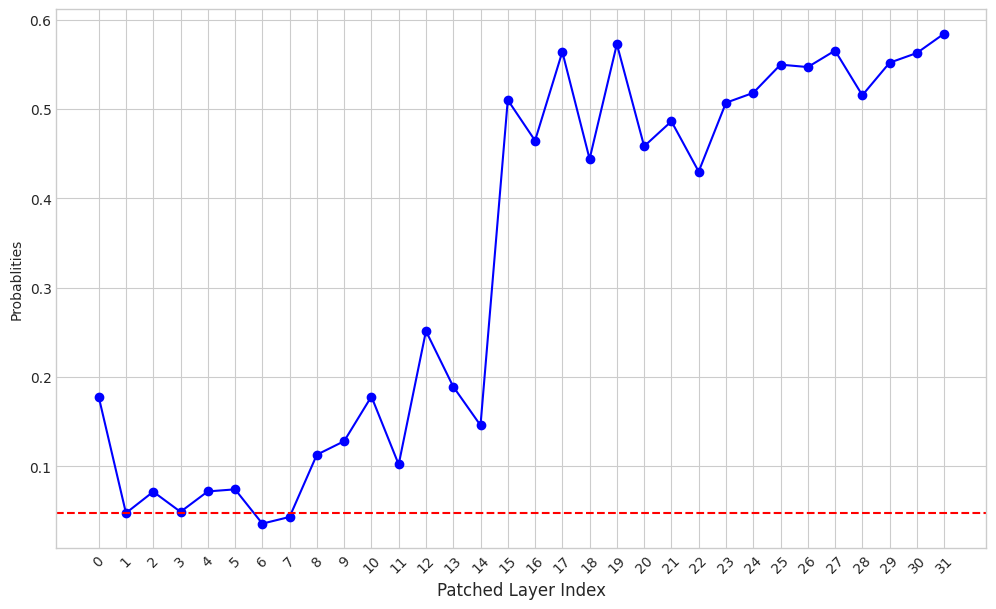

In [34]:
get_graph('output/causal_output_10.pt')

### Model Patched Probs Across 1000 samples

In [ ]:
get_graph('output/causal_output_1000.pt')